<a href="https://colab.research.google.com/github/HongyuJiang/ChartFlow/blob/master/chat_features_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import os
import time
import datetime

import plotly
plotly.tools.set_credentials_file(username='gagamiaomiao', api_key='UUEINrmUusqzCyciYJUz')
print(plotly.__version__)

3.6.1


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_to_file = '/content/drive/My Drive/dark_learning/chatting_records2.txt'
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8').replace('\ufeff','').replace('[图片]', '嫐').replace('[表情]', '嬲') 
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 2610569 characters


In [0]:
lines = text.split('\r\n')
lines_len = len(lines)
name_header = dict()
rounds = []

content = ''
date = ''
_time = ''
speaker = ''

for i in range(0, lines_len - 4):
    
  spaceNum = lines[i].count(' ')
  maoNum = lines[i].count(':')

  if spaceNum == 2 and maoNum == 2:
    
    meta = dict()
    #print(speaker + ': ' + content + '\n')
    
    round_info = lines[i].split(' ')
    date = round_info[0]
    _time = round_info[1]
    speaker = round_info[2]
    
    meta['date'] = date
    meta['time'] = _time
    meta['nickname'] = speaker
    meta['speaker'] = ''
    meta['content'] = content
    
    rounds.append(meta)
    
    content = ''
  else:
    meta['content'] += lines[i].replace('\r\n','')
  
  if speaker in name_header:
    name_header[speaker] += 1
  else:
    name_header[speaker] = 1
  #print(speaker + ': ' + content + ' | ' + date)

In [0]:
for i in range(0, len(rounds)):
  nickname = rounds[i]['nickname']
  if nickname in {'蒋宏宇','蒋有毒','蒋有毒客服','有毒客服','略略略','🐷'}:
    rounds[i]['speaker'] = '爸爸'
  else: 
    if nickname == '啦':
      rounds[i]['speaker'] = '幺儿'

In [6]:
contex_speaker = 'NULL'
summerized_rounds = []


for i in range(0, len(rounds)):
  speaker = rounds[i]['speaker']
  
  if speaker == '':
    continue
    
  if speaker == contex_speaker:
    context_meta['content'] += ' ' + rounds[i]['content']
  else:
    if contex_speaker != 'NULL':
      summerized_rounds.append(context_meta)
      
    contex_speaker = speaker
    context_meta = dict()
    context_meta['date'] = rounds[i]['date']
    context_meta['time'] = rounds[i]['time']
    context_meta['speaker'] = rounds[i]['speaker']
    context_meta['content'] = rounds[i]['content']
    
    if i < len(rounds) - 1:
      context_meta['receiver'] = rounds[i + 1]['nickname']
    else:
      context_meta['receiver'] = rounds[i - 1]['nickname']
   

print(len(summerized_rounds))

for i in range(10):
  print(summerized_rounds[i])

39744
{'date': '2018-09-08', 'time': '8:20:40', 'speaker': '幺儿', 'content': '师兄 你什么方向啊?', 'receiver': '蒋宏宇'}
{'date': '2018-09-08', 'time': '8:21:02', 'speaker': '爸爸', 'content': '可视化方向 新生见面会你好像没来吧', 'receiver': '蒋宏宇'}
{'date': '2018-09-08', 'time': '8:50:28', 'speaker': '幺儿', 'content': '科学可视化跟信息可视化都是吗? 嫐', 'receiver': '啦'}
{'date': '2018-09-08', 'time': '11:01:50', 'speaker': '爸爸', 'content': '都做过点 主要还是做可视分析 嫐', 'receiver': '蒋宏宇'}
{'date': '2018-09-08', 'time': '12:00:17', 'speaker': '幺儿', 'content': '师兄我以后可能是做移动通信方面的，这边实验室的师兄说我学的跟你比较像，师兄以后多指教 嫐', 'receiver': '啦'}
{'date': '2018-09-08', 'time': '12:00:48', 'speaker': '爸爸', 'content': '你做联通数据啊 可以的呢 前期我们已经发过几篇文章了', 'receiver': '蒋宏宇'}
{'date': '2018-09-08', 'time': '12:01:21', 'speaker': '幺儿', 'content': '关键我现在就是个菜鸟 我今天还看了你的论文', 'receiver': '啦'}
{'date': '2018-09-08', 'time': '12:01:39', 'speaker': '爸爸', 'content': '可以上实验室主页看看，又不能启发一下 找找新的点', 'receiver': '蒋宏宇'}
{'date': '2018-09-08', 'time': '12:01:48', 'speaker': '幺儿', 'content': '好牛逼的

In [0]:
data_bucket = dict()

for index in range(len(summerized_rounds)):
  meta = summerized_rounds[index]
  emoji_count = meta['content'].count('嬲')
  image_count = meta['content'].count('嫐')
  char_count = meta['content'].count(' ')
  
  #key_date = int(time_stamp)
  key_date = meta['date']
  if key_date in data_bucket:
    data_bucket[key_date]['emoji'] += emoji_count
    data_bucket[key_date]['image'] += image_count
    data_bucket[key_date]['len'] += char_count
  else:
    data_bucket[key_date] = dict()
    data_bucket[key_date]['emoji'] = emoji_count
    data_bucket[key_date]['image'] = image_count
    data_bucket[key_date]['len'] = char_count
    
#print(data_bucket)

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

emoji_sequence = [meta['emoji'] for meta in list(data_bucket.values())]
image_sequence = [meta['image'] for meta in list(data_bucket.values())]
length_sequence = [meta['len']/10 for meta in list(data_bucket.values())]


trace1 = go.Bar(
    x= list(data_bucket.keys()),
    y= list(length_sequence),
    name = '句子数量/10',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=0,
        )
    ),
)

trace2 = go.Scatter(
    x= list(data_bucket.keys()),
    y= list(image_sequence),
    connectgaps=True,
    name = '聊天图片数量',
    marker=dict(
        color='rgb(50,50,50)',
     
    ),
)

trace3 = go.Scatter(
    x= list(data_bucket.keys()),
    y= list(emoji_sequence),
    connectgaps=True,
    name = '表情数量',
    marker=dict(
        color='rgb(200,30,30)',
       
    ),
)

data = [trace1, trace2, trace3]

fig = dict(data=data)
py.iplot(fig, filename='simple-connectgaps')

In [9]:
comparison_bucket = dict()

for index in range(len(summerized_rounds)):
  meta = summerized_rounds[index]

  seq_count = len(meta['content'])
  key_date = meta['date']
  if key_date in comparison_bucket:
    if meta['speaker'] == '爸爸':
      comparison_bucket[key_date]['爸爸'] += seq_count
    else:
      comparison_bucket[key_date]['幺儿'] += seq_count
  else:
    comparison_bucket[key_date] = dict()
    comparison_bucket[key_date]['爸爸'] = seq_count
    comparison_bucket[key_date]['幺儿'] = seq_count
    
baba_sequence = [meta['爸爸'] for meta in list(comparison_bucket.values())]
yaoer_sequence = [meta['幺儿'] for meta in list(comparison_bucket.values())]

trace0 = go.Bar(
    x= list(comparison_bucket.keys()),
    y= list(baba_sequence),
    name='爸爸',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x= list(comparison_bucket.keys()),
    y= list(yaoer_sequence),
    name='幺儿',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]

layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')
    

# 主题词识别

In [0]:

import matplotlib
import scipy
import matplotlib.pyplot as plt
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

import jieba
import jieba.posseg
import pandas as pd
import re

In [0]:
def cut_words_with_pos(text):
    seg = jieba.posseg.cut(text)
    res = []
    for i in seg:
        if i.flag in ["a", "v", "x", "n", "an", "vn", "nz", "nt", "nr"] and is_fine_word(i.word):
            res.append(i.word)
    return list(res)
  
def is_fine_word(word, min_length=2):
    rule = re.compile(r"^[\u4e00-\u9fa5]+$")
    if len(word) >= min_length and re.search(rule, word):
        return True
    else:
        return False

In [12]:
yaoer_sentences = []
yaoer_words_fre = dict()

for index in range(len(summerized_rounds)):
  meta = summerized_rounds[index]
  
  if meta['speaker'] == '幺儿':
    seg_list = cut_words_with_pos(meta['content'].strip())
    yaoer_sentences += seg_list
  
cnt = pd.Series(yaoer_sentences).value_counts().head(30)
      
print(cnt)



Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.845 seconds.
Prefix dict has been built succesfully.


觉得     938
喜欢     531
师兄     507
没有     500
感觉     481
晓得     453
可能     378
时候     354
看到     309
应该     266
不得     216
有点     201
不会     193
搞笑     184
没得     178
知道     174
肯定     166
不能     160
出来     157
好像     157
老板     153
实验室    151
还有     146
好看     143
娃子     143
朋友     138
不想     131
老师     118
吃饭     115
手机     111
dtype: int64


In [0]:
#!pip uninstall pbr
#!pip install lda


INFO:lda:n_documents: 3
INFO:lda:vocab_size: 5280
INFO:lda:n_words: 17163
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -185218
INFO:lda:<10> log likelihood: -156046
INFO:lda:<20> log likelihood: -153808
INFO:lda:<30> log likelihood: -153386
INFO:lda:<40> log likelihood: -152732
INFO:lda:<50> log likelihood: -152056
INFO:lda:<60> log likelihood: -151455
INFO:lda:<70> log likelihood: -151231
INFO:lda:<80> log likelihood: -151243
INFO:lda:<90> log likelihood: -151067
INFO:lda:<100> log likelihood: -151084
INFO:lda:<110> log likelihood: -150866
INFO:lda:<120> log likelihood: -150826
INFO:lda:<130> log likelihood: -150878
INFO:lda:<140> log likelihood: -150980
INFO:lda:<150> log likelihood: -150734
INFO:lda:<160> log likelihood: -150861
INFO:lda:<170> log likelihood: -150706
INFO:lda:<180> log likelihood: -150625
INFO:lda:<190> log likelihood: -150870
INFO:lda:<200> log likelihood: -151120
INFO:lda:<210> log likelihood: -150775
INFO:lda:<220> log likelihood: -15096

Topic 0: 觉得 张兰云 朋友 女朋友 可爱 老子 拍手 不到 回来 红包 看到 老汉 小可爱 衣服 看过 看上去 不想 酒店 老赵 室友
Topic 1: 晓得 肯定 还有 好像 出来 没有 吃饭 开始 联系 需要 屁屁 样子 好吃 出去 我会 有趣 男人 呵呵 学校 希望
Topic 2: 知道 老板 应该 实验室 没有 看到 一般 不行 时间 师兄 学习 眼睛 厉害 论文 名字 看着 问题 数据 张野 有毒
Topic 3: 没得 搞笑 不得 没事 起来 估计 恐怖 事情 蒋宏宇 结果 脑壳 老师 看看 女生 发现 说话 晚安 牛皮 论文 床上
Topic 4: 喜欢 有点 感觉 可能 妹妹 时候 丁丁 好看 不会 变态 开心 卧槽 还好 不能 男朋友 意思 手机 人家 华容 回去


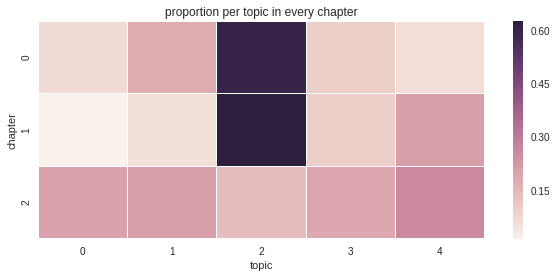

第1章 (top topic: [2 1 3])
第2章 (top topic: [2 4 3])
第3章 (top topic: [4 1 0])


In [15]:
import lda
import matplotlib.pyplot as plt
import seaborn as sns

yaoer_sentences_stage1 = []
yaoer_sentences_stage2 = []
yaoer_sentences_stage3 = []

corpus = []

for index in range(len(summerized_rounds)):
  meta = summerized_rounds[index]
  
  if meta['receiver'] == '蒋宏宇':
    seg_list = cut_words_with_pos(meta['content'].strip())
    yaoer_sentences_stage1 += seg_list
    
  if meta['receiver'] == '蒋有毒' or meta['receiver'] == '蒋有毒客服' and meta['receiver'] == '有毒客服' and meta['receiver'] == '略略略':
    seg_list = cut_words_with_pos(meta['content'].strip())
    yaoer_sentences_stage2 += seg_list
    
  if meta['receiver'] == '🐷':
    seg_list = cut_words_with_pos(meta['content'].strip())
    yaoer_sentences_stage3 += seg_list

corpus = [" ".join(yaoer_sentences_stage1), " ".join(yaoer_sentences_stage2), " ".join(yaoer_sentences_stage3)]
  
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
weight = X.toarray()

def plot_topic(doc_topic):
    f, ax = plt.subplots(figsize=(10, 4))
    cmap = sns.cubehelix_palette(start=1, rot=3, gamma=0.8, as_cmap=True)
    sns.heatmap(doc_topic, linewidths=0.05, ax=ax)
    ax.set_title('proportion per topic in every chapter')
    ax.set_xlabel('topic')
    ax.set_ylabel('chapter')
    plt.show()
    #f.savefig('output/topic_heatmap.jpg', bbox_inches='tight')


def lda_train(weight, vectorizer):
    model = lda.LDA(n_topics=5, n_iter=500, random_state=1)
    model.fit(weight)

    doc_num = len(weight)
    topic_word = model.topic_word_
    vocab = vectorizer.get_feature_names()
    titles = ["第{}章".format(i) for i in range(1, doc_num + 1)]

    n_top_words = 20
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
        print('Topic {}: {}'.format(i, ' '.join(topic_words)))

    doc_topic = model.doc_topic_
    #print(doc_topic, type(doc_topic))
    plot_topic(doc_topic)
    for i in range(doc_num):
        print("{} (top topic: {})".format(titles[i], np.argsort(doc_topic[i])[:-4:-1]))

lda_train(weight, vectorizer)